TEMPERATURA


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [23]:
f = "../../Weather Station Data/Cuchillacocha_CUCHWX_5Jul13_6Apr20.csv"
df =  pd.read_csv(f, encoding="latin1")

In [24]:

df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')

df.set_index('Datetime', inplace=True)

# Calcular a média diária da variável de precipitação
media_diaria = df['Temperature (°C)'].resample('D').mean()

# Criar listas separadas de datas e médias
datas = media_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
medias = media_diaria.tolist()  # Converter as médias para uma lista
datas = pd.to_datetime(datas)
df = pd.DataFrame({'data': datas, 'media': medias})

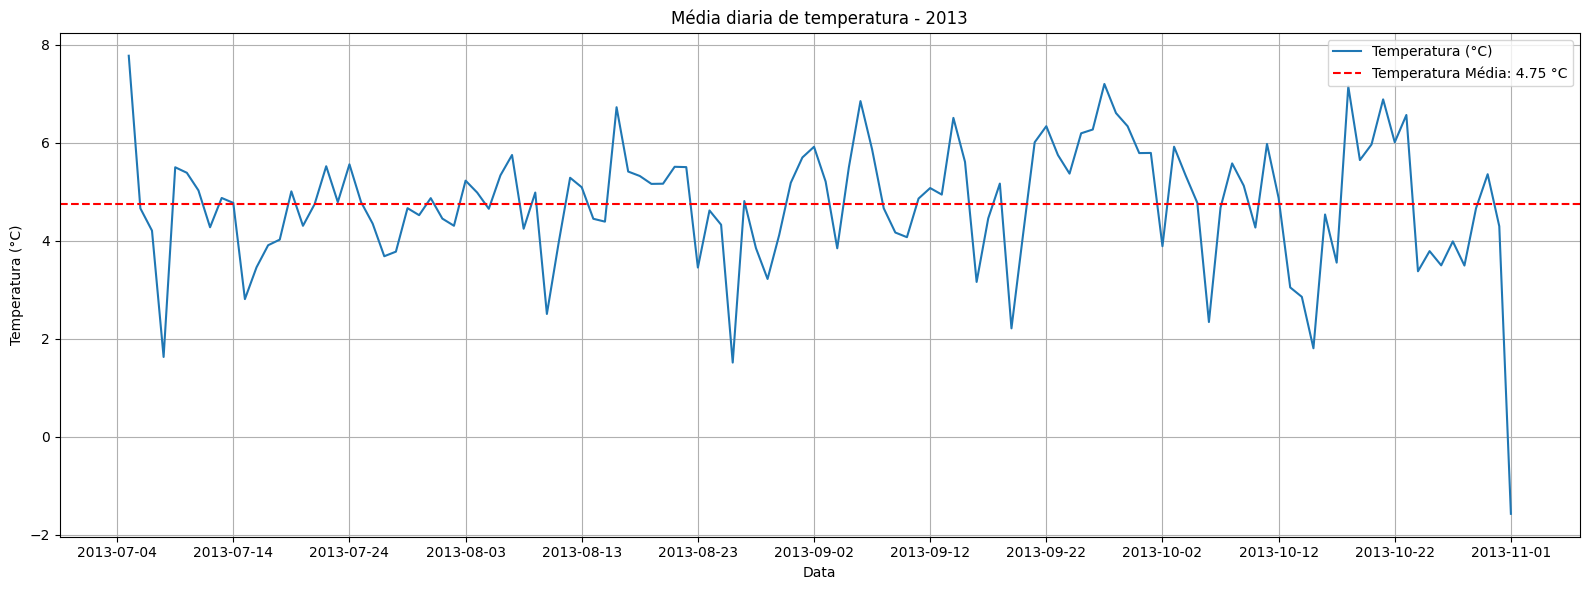

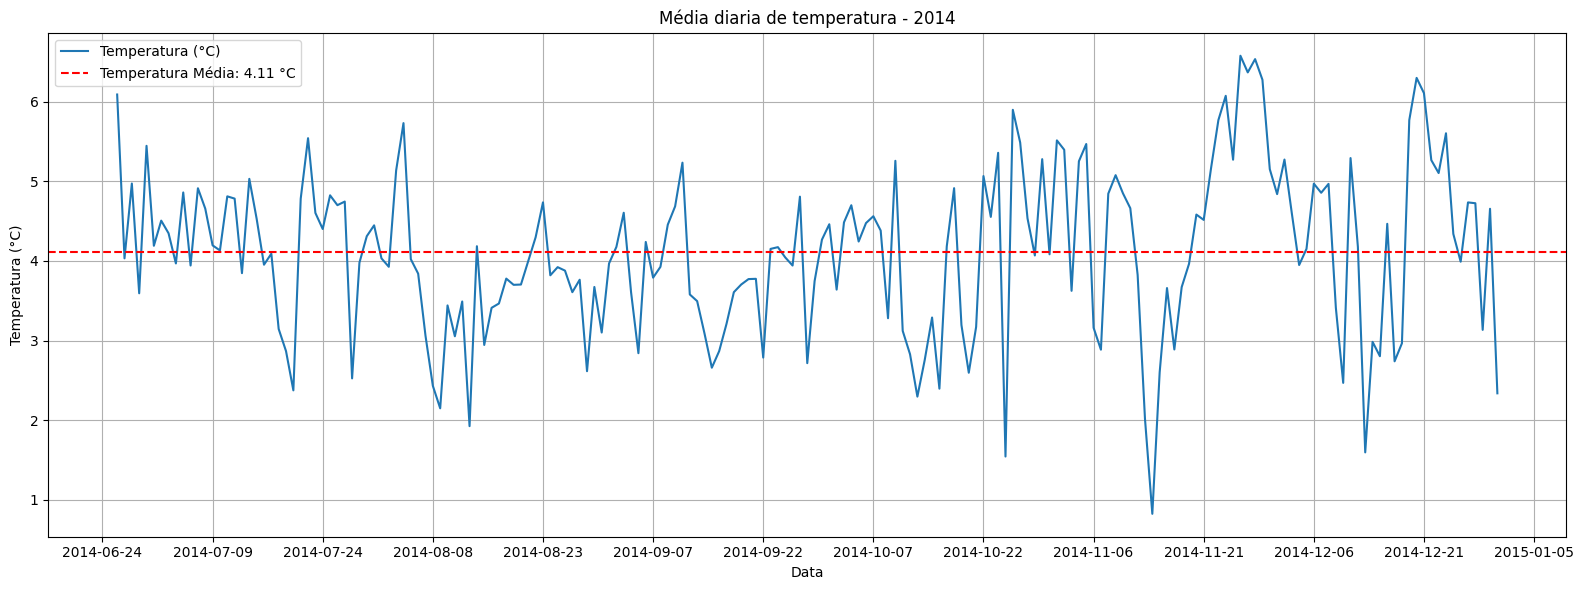

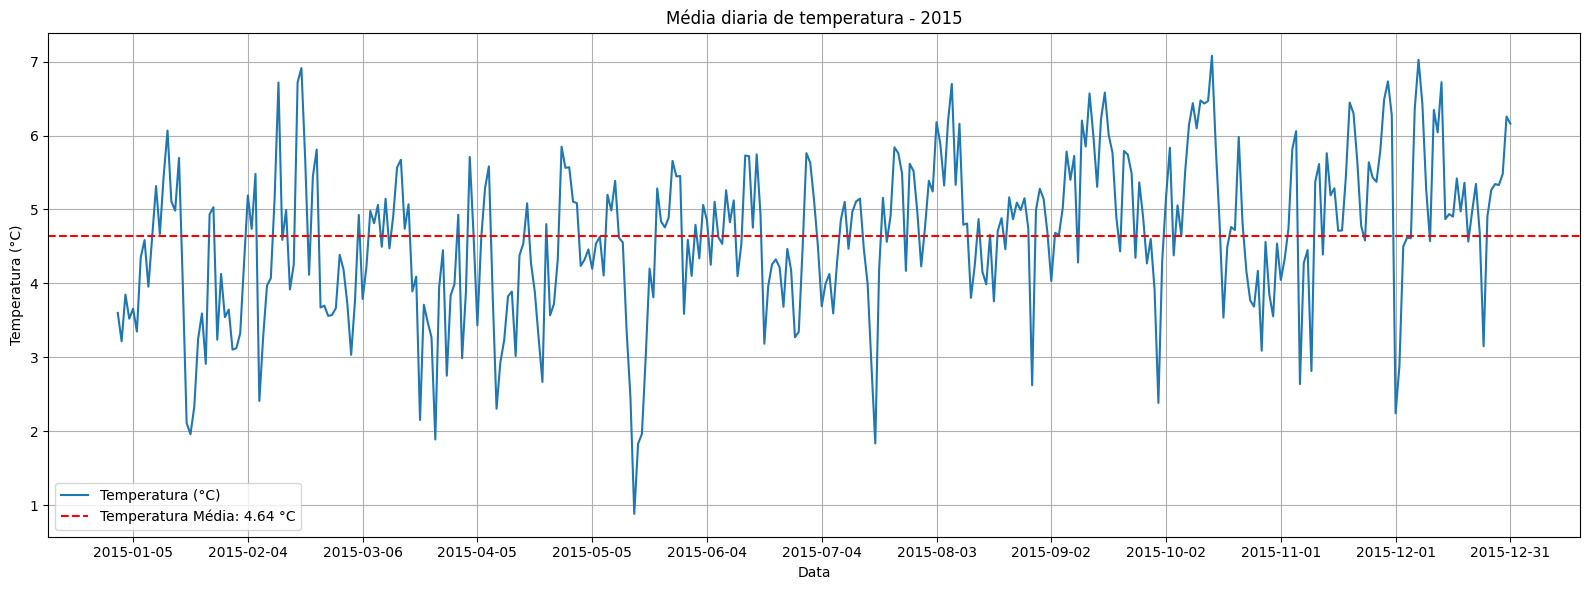

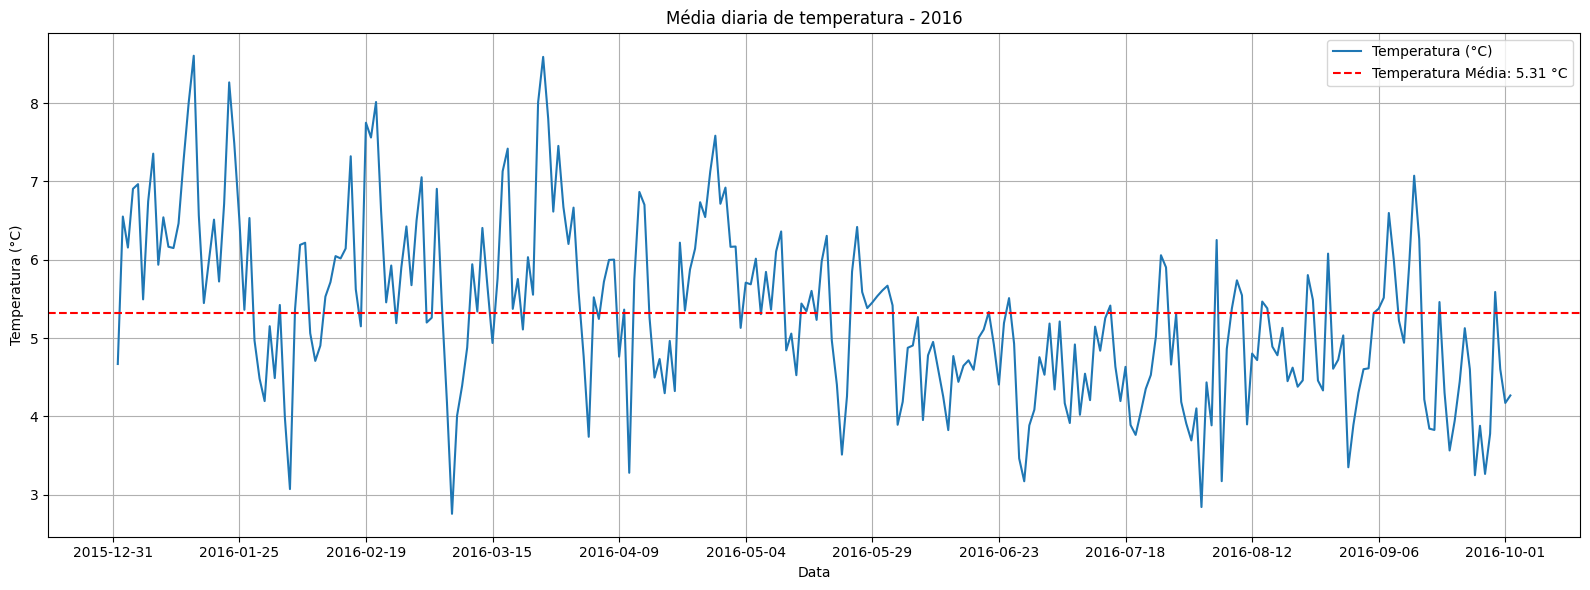

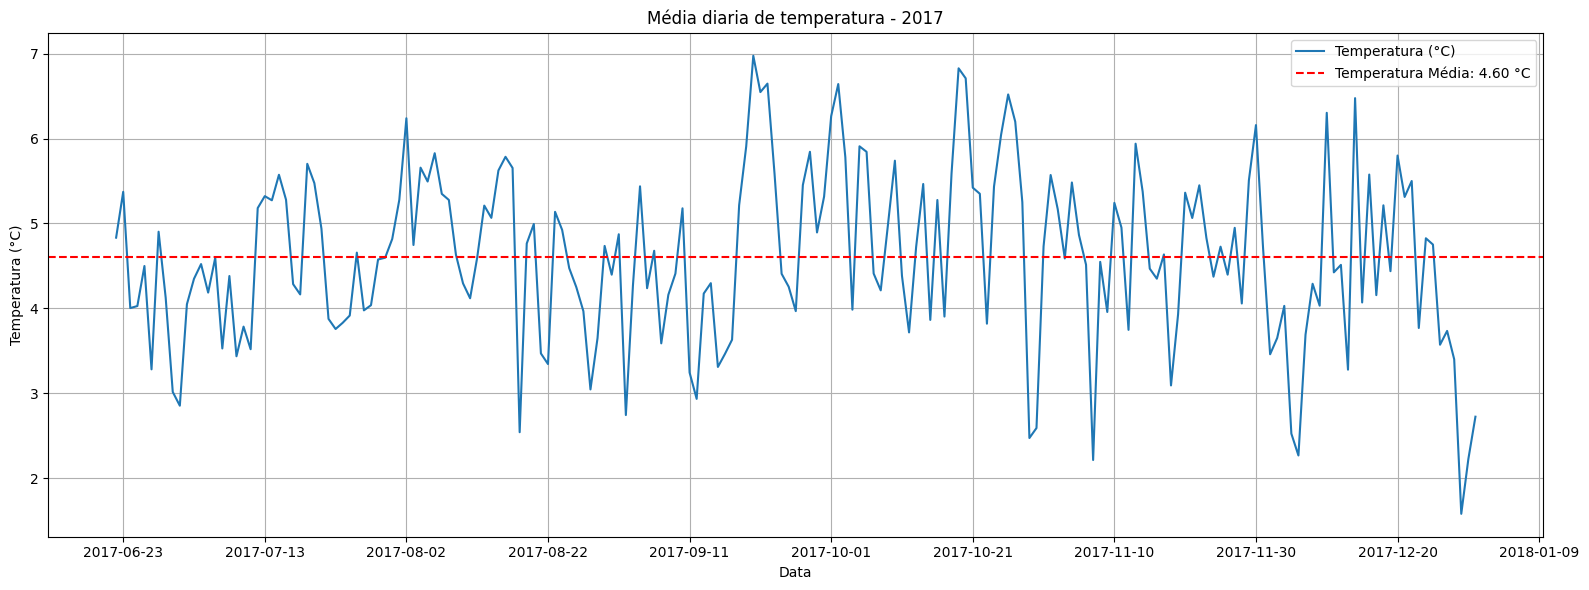

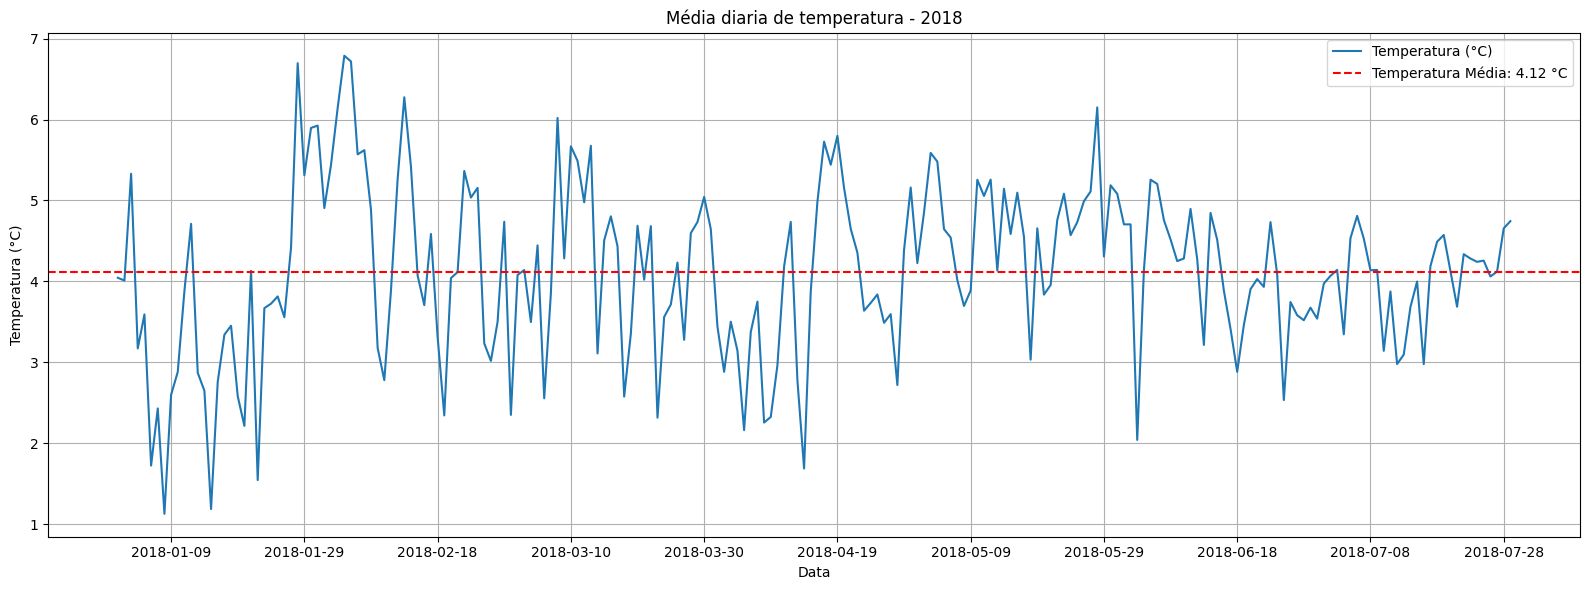

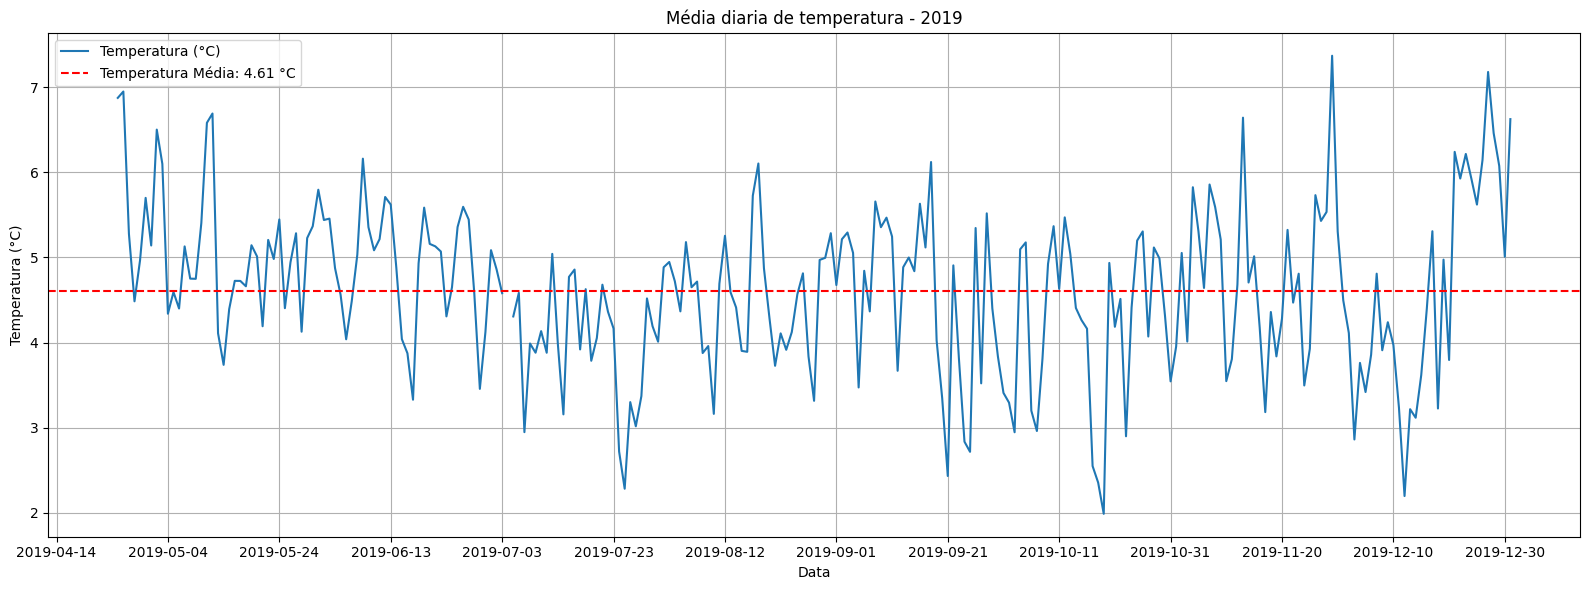

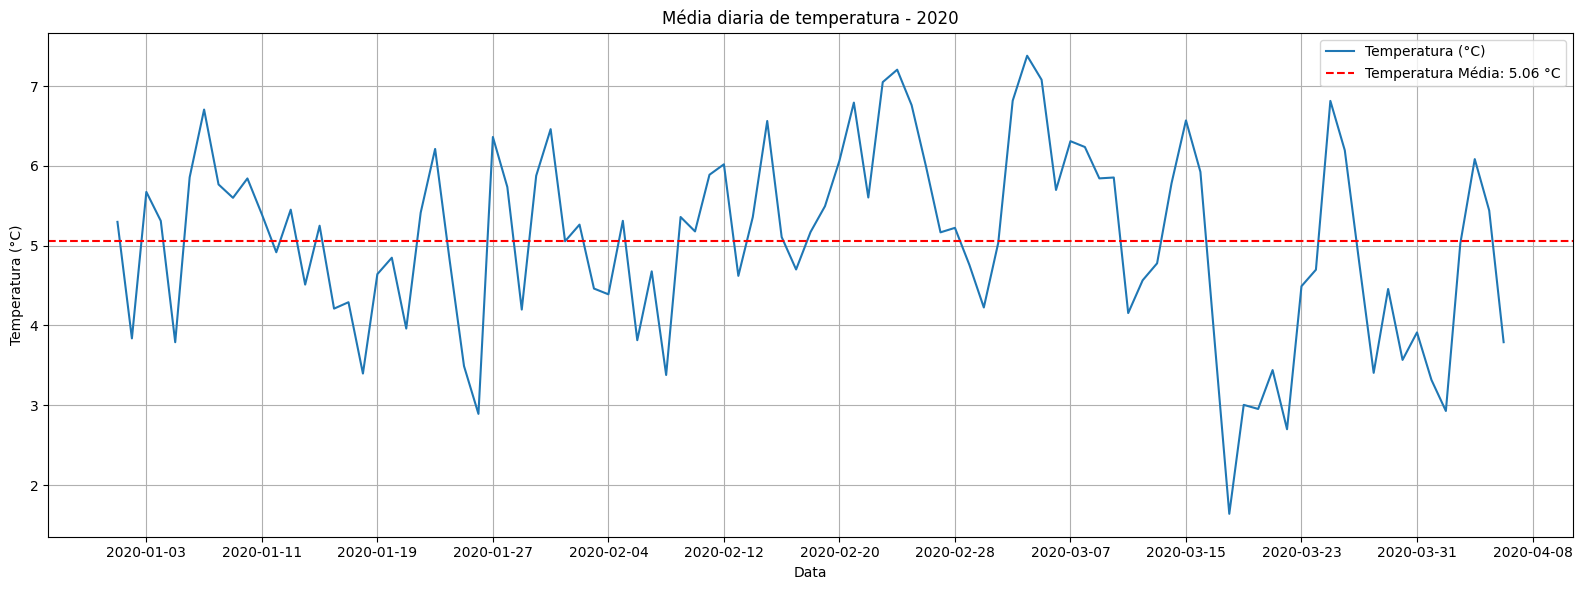

In [25]:
# Obter os anos únicos presentes nos dados
anos_unicos = df['data'].dt.year.unique()

# Criar gráficos separados para cada ano
for ano in anos_unicos:
    # Filtrar os dados para o ano atual
    df_ano = df[df['data'].dt.year == ano]
    
    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df_ano['data'], df_ano['media'], label=f'Temperatura (°C)')
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(14))

    # Calcular a precipitação média para o ano
    temperatura_media = df_ano['media'].mean()

    # Adicionar a linha de precipitação média com valor na legenda
    ax.axhline(y=temperatura_media, color='red', linestyle='--', label=f'Temperatura Média: {temperatura_media:.2f} °C')



    
    # Adicionar título e rótulos
    plt.title(f'Média diaria de temperatura - {ano}')
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid()
    
    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

In [26]:
anos_unicos = df['data'].dt.year.unique()
media_por_ano = []
for ano in anos_unicos:
    df_ano = df[df['data'].dt.year == ano]
    media_ano = df_ano['media'].mean()
    print(f"A média de todas as precipitação diárias em {ano} é: {media_ano:.2f}")
    if media_ano > 0:
        media_por_ano.append(media_ano)


A média de todas as precipitação diárias em 2013 é: 4.75
A média de todas as precipitação diárias em 2014 é: 4.11
A média de todas as precipitação diárias em 2015 é: 4.64
A média de todas as precipitação diárias em 2016 é: 5.31
A média de todas as precipitação diárias em 2017 é: 4.60
A média de todas as precipitação diárias em 2018 é: 4.12
A média de todas as precipitação diárias em 2019 é: 4.61
A média de todas as precipitação diárias em 2020 é: 5.06


In [27]:
media_anos = sum(media_por_ano)/len(media_por_ano)

In [28]:
print(f"A média de temperatura anual entre {min(anos_unicos)} a {max(anos_unicos)} foi de: {media_anos:.2f}")

A média de temperatura anual entre 2013 a 2020 foi de: 4.65


In [29]:
f = "../../Weather Station Data/Cuchillacocha_CUCHWX_5Jul13_6Apr20.csv"
df =  pd.read_csv(f, encoding="latin1")
dados = df
dados['Datetime'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

df.set_index('Datetime', inplace=True)

# Calcular a média diária da variável de precipitação
media_diaria = dados['Temperature (°C)'].resample('D').mean()

# Criar listas separadas de datas e médias
datas = media_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
medias = media_diaria.tolist()  # Converter as médias para uma lista
datas = pd.to_datetime(datas)
dados = pd.DataFrame({'Data': datas, 'media': medias})

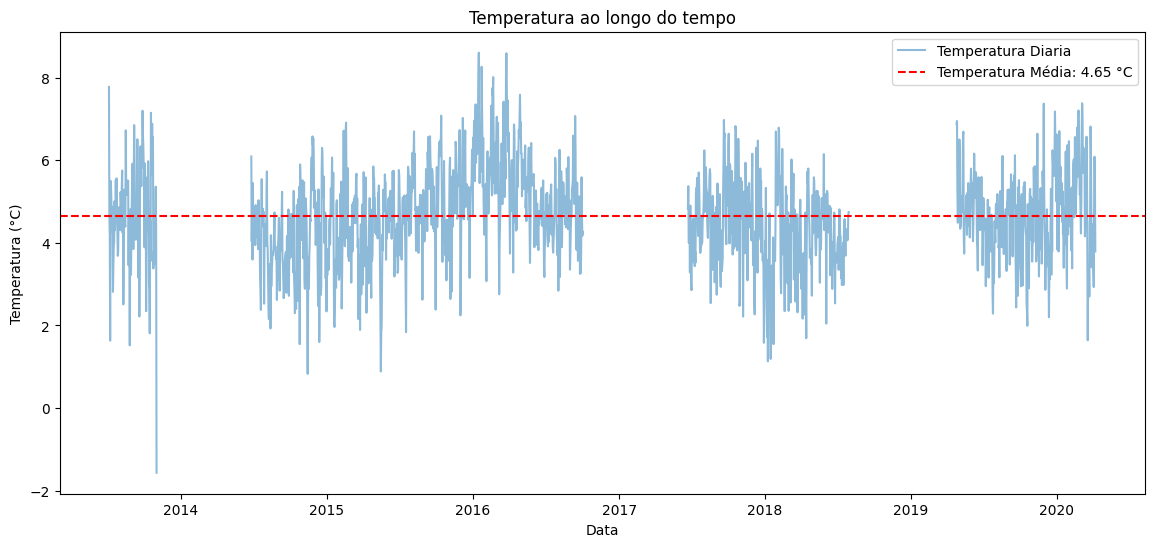

In [30]:
#Converter a coluna de data para o formato datetime
dados['Data'] = pd.to_datetime(dados['Data'], format='%m-%d-%Y')

# Extrair informações de mês e ano
dados['Mês'] = dados['Data'].dt.month
dados['Ano'] = dados['Data'].dt.year
# Calcular a precipitação média para o ano
temperatura_media = dados['media'].mean()

# Gráfico 1: Precipitação ao longo do tempo
plt.figure(figsize=(14, 6))

plt.plot(dados['Data'], dados['media'], label='Temperatura Diaria', alpha=0.5)
plt.axhline(y=temperatura_media, color='red', linestyle='--', label=f'Temperatura Média: {temperatura_media:.2f} °C')

plt.title('Temperatura ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [31]:

# Carregar os dados
f = "../../Weather Station Data/Cuchillacocha_CUCHWX_5Jul13_6Apr20.csv"
dados = pd.read_csv(f, encoding="latin1")

# Converter a coluna de data para o formato datetime
dados['Datetime'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

# Determinar os anos mínimo e máximo do conjunto de dados
min_year = dados['Datetime'].dt.year.min()
max_year = dados['Datetime'].dt.year.max()

# Definir o intervalo de datas abrangendo anos completos
start_date = f"{int(min_year)}/01/01 00:00"
end_date = f"{int(max_year)}/12/31 23:59"

# Criar um intervalo completo com frequência de 30 minutos
full_date_range = pd.date_range(start=start_date, end=end_date, freq='30T')

# Reindexar o DataFrame para o intervalo completo de datas e horários
dados.set_index('Datetime', inplace=True)
dados_full = dados.reindex(full_date_range)

# Renomear o índice para 'Datetime'
dados_full.index.name = 'Datetime'

# Adicionar uma coluna de ano para análise
dados_full['Ano'] = dados_full.index.year

# Calcular o percentual de valores ausentes por ano
percent_nan_por_ano = dados_full['Temperature (°C)'].isna().groupby(dados_full['Ano']).mean() * 100

# Selecionar apenas os anos com menos de 10% de NaN
anos_validos = percent_nan_por_ano[percent_nan_por_ano < 35].index

# Filtrar o DataFrame para conter apenas os anos válidos
dados_filtrados = dados_full[dados_full['Ano'].isin(anos_validos)]

df = dados_filtrados

# Calcular a média diária da variável de precipitação
media_diaria = df['Temperature (°C)'].resample('D').mean()

# Criar listas separadas de datas e médias
datas = media_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
medias = media_diaria.tolist()  # Converter as médias para uma lista
datas = pd.to_datetime(datas)
df = pd.DataFrame({'data': datas, 'media': medias})


/tmp/ipykernel_4751/2051644941.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_date_range = pd.date_range(start=start_date, end=end_date, freq='30T')


In [32]:

# Extrair informações de mês e ano
df['Mês'] = df['data'].dt.month
df['Ano'] = df['data'].dt.year

media_mensal = df.groupby('Mês')['media'].mean()

In [33]:

# Criar uma escala de cores baseada nos valores de precipitação
norm = mcolors.Normalize(vmin=media_mensal.min(), vmax=media_mensal.max())  # Normalização para o range dos dados
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)  # Usando a paleta 'viridis'

/tmp/ipykernel_4751/1274491168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4751/1274491168.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


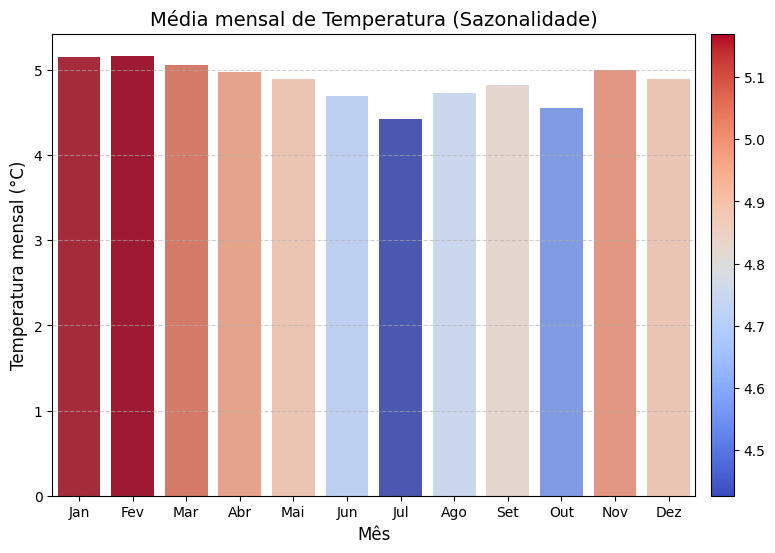

In [34]:
# Adicionar as cores ao gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=media_mensal.index,
    y=media_mensal.values,
    palette=sns.color_palette('coolwarm', as_cmap=True)(norm(media_mensal.values))
)

# Configurações do gráfico
plt.title('Média mensal de Temperatura (Sazonalidade)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Temperatura mensal (°C)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Adicionar uma barra de cores
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [35]:
import pandas as pd

/tmp/ipykernel_4751/21870941.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_date_range = pd.date_range(start=start_date, end=end_date, freq='30T')
/tmp/ipykernel_4751/21870941.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal_temperatura = dados_filtrados['Temperature (°C)'].resample('M').mean()
/tmp/ipykernel_4751/21870941.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4751/21870941.py:54: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


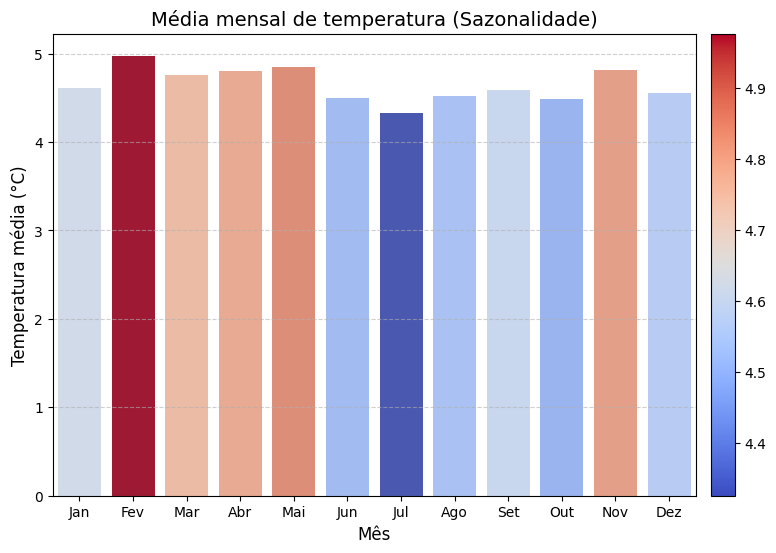

In [37]:
# Carregar os dados
f = "../../Weather Station Data/Cuchillacocha_CUCHWX_5Jul13_6Apr20.csv"
dados = pd.read_csv(f, encoding="latin1")

# Converter a coluna de data para o formato datetime
dados['Datetime'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

# Determinar os anos mínimo e máximo do conjunto de dados
min_year = dados['Datetime'].dt.year.min()
max_year = dados['Datetime'].dt.year.max()

# Definir o intervalo de datas abrangendo anos completos
start_date = f"{int(min_year)}/01/01 00:00"
end_date = f"{int(max_year)}/12/31 23:59"

# Criar um intervalo completo com frequência de 30 minutos
full_date_range = pd.date_range(start=start_date, end=end_date, freq='30T')

# Reindexar o DataFrame para o intervalo completo de datas e horários
dados.set_index('Datetime', inplace=True)
dados_full = dados.reindex(full_date_range)

# Renomear o índice para 'Datetime'
dados_full.index.name = 'Datetime'

# Adicionar uma coluna de ano para análise
dados_full['Ano'] = dados_full.index.year

# Calcular o percentual de valores ausentes por ano
percent_nan_por_ano = dados_full['Temperature (°C)'].isna().groupby(dados_full['Ano']).mean() * 100

# Selecionar apenas os anos com menos de 10% de NaN
anos_validos = percent_nan_por_ano[percent_nan_por_ano < 50].index

# Filtrar o DataFrame para conter apenas os anos válidos
dados_filtrados = dados_full[dados_full['Ano'].isin(anos_validos)]

# Calcular a média mensal da variável de temperatura
media_mensal_temperatura = dados_filtrados['Temperature (°C)'].resample('M').mean()

# Criar um DataFrame com mês e média mensal
df_temp = pd.DataFrame({'Data': media_mensal_temperatura.index, 'Média': media_mensal_temperatura.values})
df_temp['Mês'] = df_temp['Data'].dt.month

# Calcular a média mensal para cada mês ao longo dos anos
media_mensal_temp = df_temp.groupby('Mês')['Média'].mean()

# Criar uma escala de cores baseada nos valores de temperatura
norm_temp = mcolors.Normalize(vmin=media_mensal_temp.min(), vmax=media_mensal_temp.max())
sm_temp = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm_temp)

# Adicionar as cores ao gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=media_mensal_temp.index,
    y=media_mensal_temp.values,
    palette=sns.color_palette('coolwarm', as_cmap=True)(norm_temp(media_mensal_temp.values))
)

# Configurações do gráfico
plt.title('Média mensal de temperatura (Sazonalidade)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Temperatura média (°C)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Adicionar uma barra de cores
cbar_temp = plt.colorbar(sm_temp, ax=plt.gca(), orientation='vertical', pad=0.02)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
